In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv(r"C:\Users\vigns\Downloads\Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# UniVariate Analysis

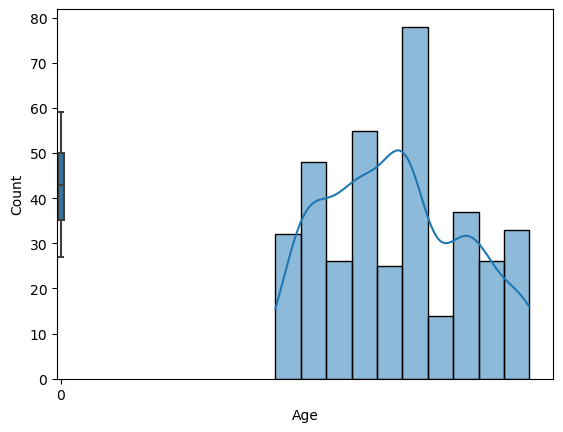

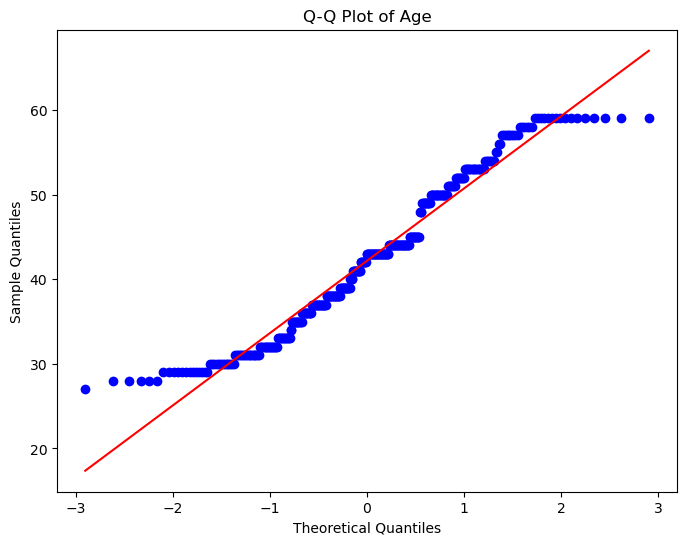

In [7]:
sns.boxplot(df['Age'])#no outliers in age column
df['Age'].mean()
import scipy.stats as stats
import matplotlib.pyplot as plt

sns.histplot(df['Age'],kde=True)

# Q-Q plot for the 'Age' column
plt.figure(figsize=(8, 6))
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#fat tail data

In [8]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

<Axes: >

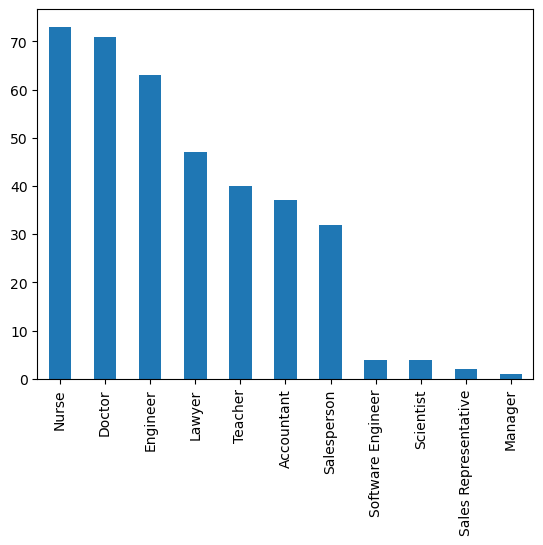

In [9]:
df['Occupation'].value_counts().plot(kind='bar')

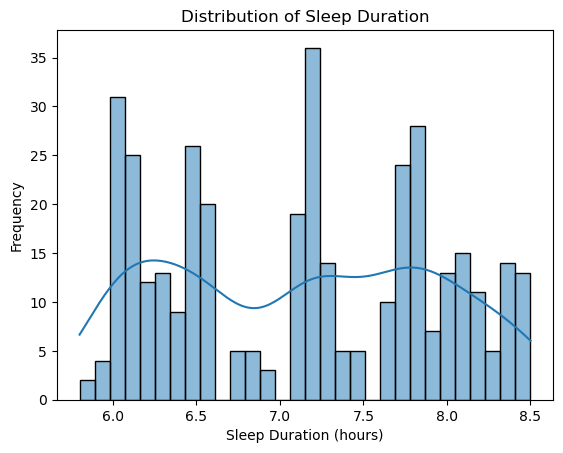

In [10]:
df['Sleep Duration'].describe()
sns.histplot(df['Sleep Duration'], bins=30, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

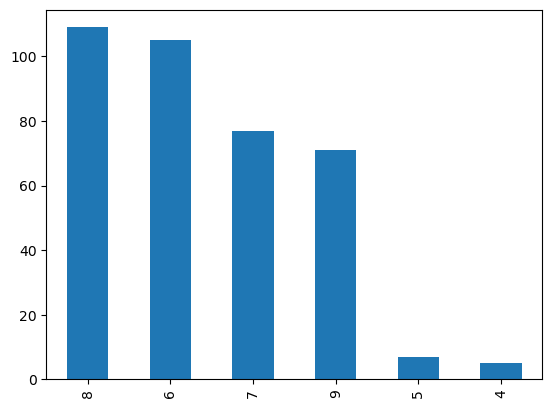

In [11]:
df['Quality of Sleep'].value_counts().plot(kind='bar')

<Axes: >

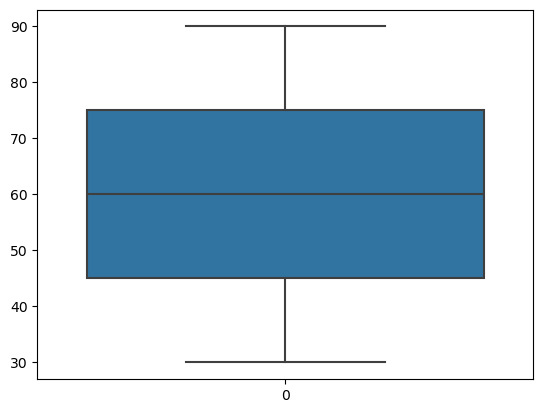

In [12]:
df['Physical Activity Level'].describe()
sns.boxplot(df['Physical Activity Level'])

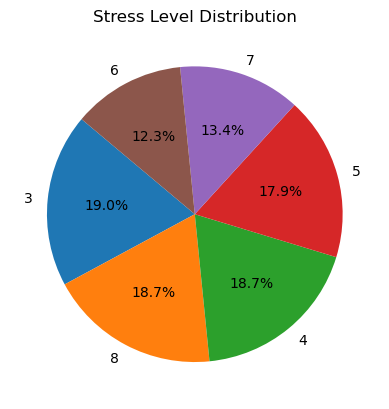

In [13]:

stress_counts = df['Stress Level'].value_counts()
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Stress Level Distribution')
plt.ylabel('')
plt.show()


<Axes: >

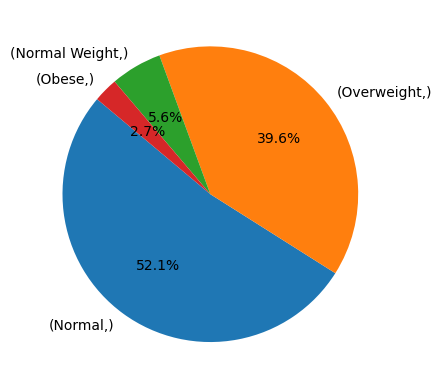

In [14]:
df[['BMI Category']].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=140)

# Bi-Variate and Multi-Variate Analysis
# 1.Numerical-Numerical Data

<Axes: xlabel='Sleep Duration', ylabel='Age'>

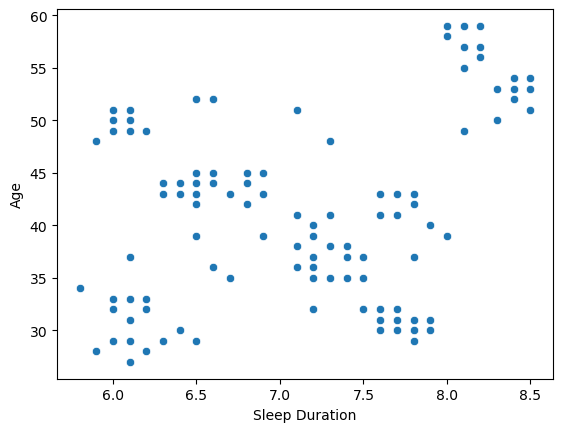

In [15]:

age_sleep=df.groupby('Age')['Sleep Duration'].value_counts()
sns.scatterplot(data=age_sleep, x='Sleep Duration', y='Age')
#saysThere's a slight clustering of older individuals (50-60 years) getting longer sleep (around 8-8.5 hours)
#Middle-aged individuals (35-45 years) seem to have more variable sleep patterns
#There's some clustering of younger individuals (30-35 years) getting around 7.5-8 hours of sleep

There's a slight clustering of older individuals (50-60 years) getting longer sleep (around 8-8.5 hours)

Middle-aged individuals (35-45 years) seem to have more variable sleep patterns

There's some clustering of younger individuals (30-35 years) getting around 7.5-8 hours of sleep

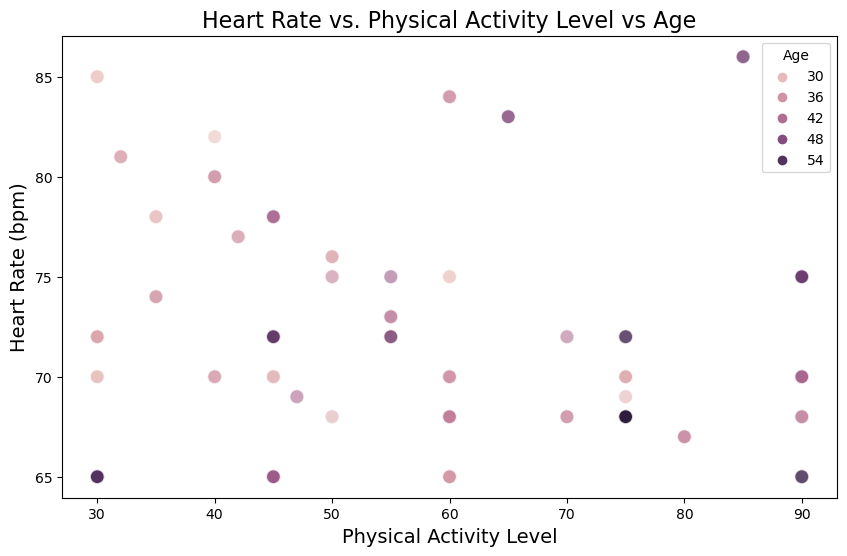

In [16]:
df[['Physical Activity Level','Heart Rate']]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Heart Rate',hue='Age',color='blue', s=100, alpha=0.6)
plt.title('Heart Rate vs. Physical Activity Level vs Age', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=14)
plt.ylabel('Heart Rate (bpm)', fontsize=14)
plt.grid(False)
plt.show()


shows negative corelation as physical rate increase heartrate decreases

1.saying moderate fitness level has moderate heart rate but low fitness has high heart rate and high fitness has low heart rate

2.here states that 90 fitness level means must be an athlete showing less bpm says 
2.1Their heart is stronger and more efficient
2.2Pumps more blood per beat (higher stroke volume)
2.3Requires fewer beats to circulate the same amount of blood
2.4Heart muscles are well-conditioned

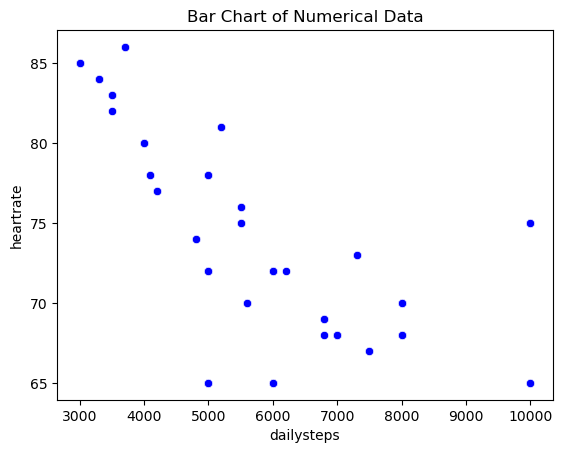

In [17]:
#plt.figure(figsize=(20,6))
sns.scatterplot(x='Daily Steps', y='Heart Rate', data=df, color='blue')
plt.xlabel('dailysteps')
plt.ylabel('heartrate')
plt.title('Bar Chart of Numerical Data')
plt.show()

1.Graph clearly says that there is neagative co-relation

2.with this we can say that fitness level and daily steps are positive co-related


# 2.Numerical - Categorical Data

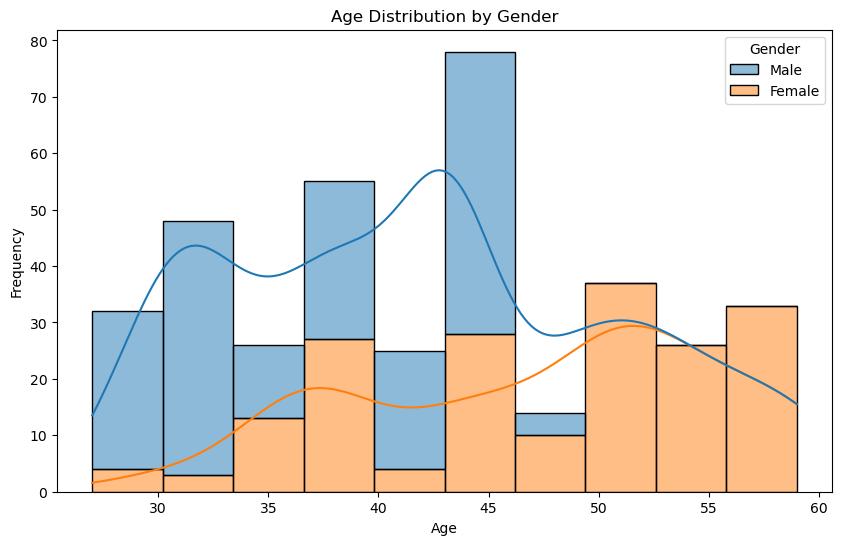

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.show()


The graph suggests that males are more prevalent in younger age groups (30s and early 40s), while females dominate in older middle-age groups (45-55)

The overall age distribution covers a wide range, with noticeable clusters in specific age ranges for each gender.








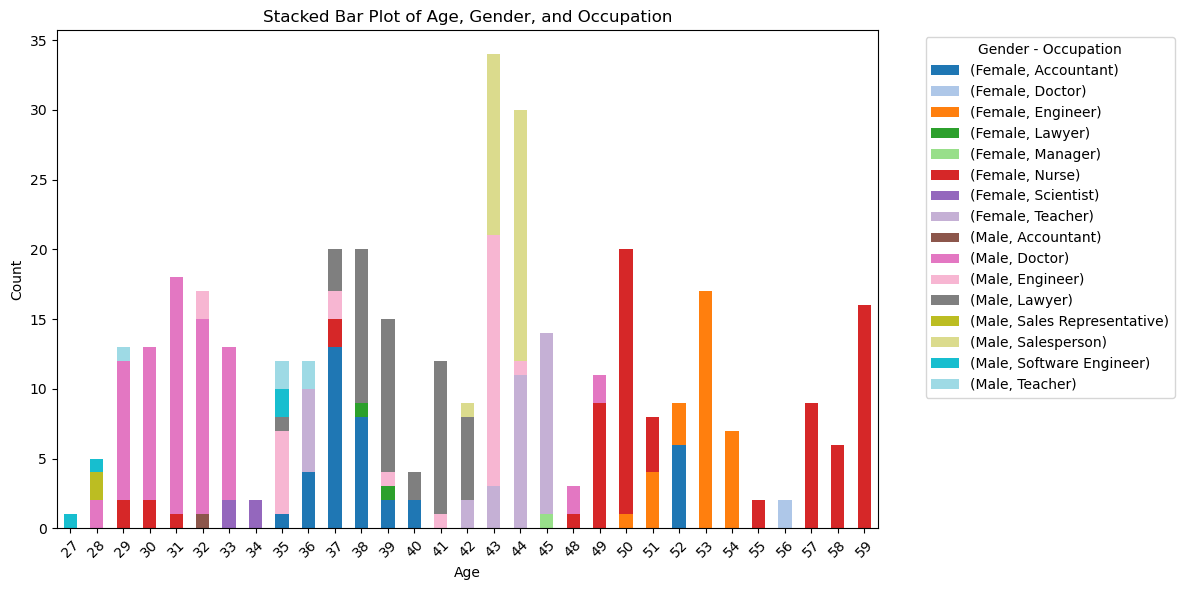

In [19]:
#not that valuable insight
pivot_df = df.pivot_table(index='Age', columns=['Gender', 'Occupation'], aggfunc='size', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Age, Gender, and Occupation')
plt.legend(title='Gender - Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1.Age Distribution:

Certain occupations peak at specific age ranges, like doctors around 30-31 and engineers around 32-35 (male) and 54-55 (female).

2.Gender Patterns:

Nursing is predominantly female, especially around 50 years old.
Engineering shows different age peaks for males (younger) and females (older).

3.Career Trends:

Sales and managerial roles are more common among older age groups, indicating potential career progression.
Younger age groups (20s to early 30s) show a more diverse mix of professions, likely reflecting early career stages.

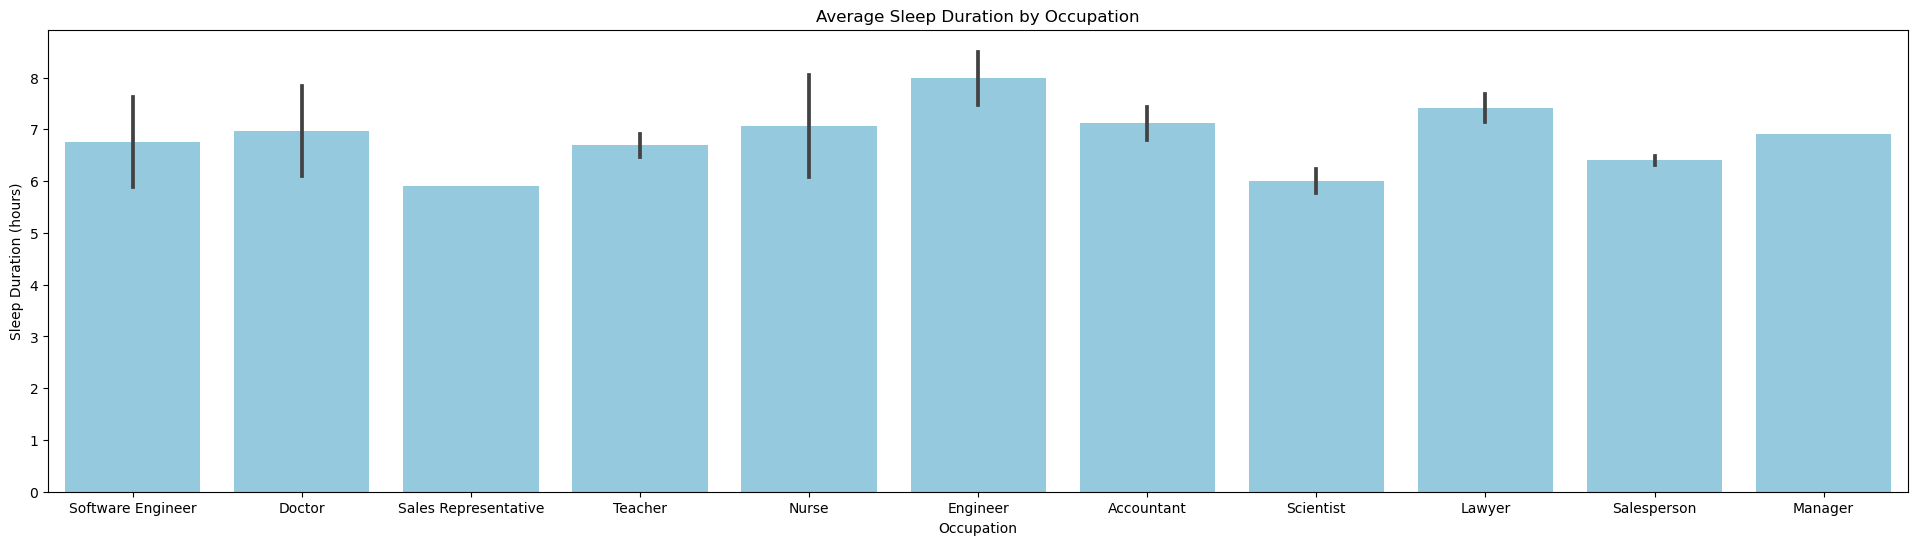

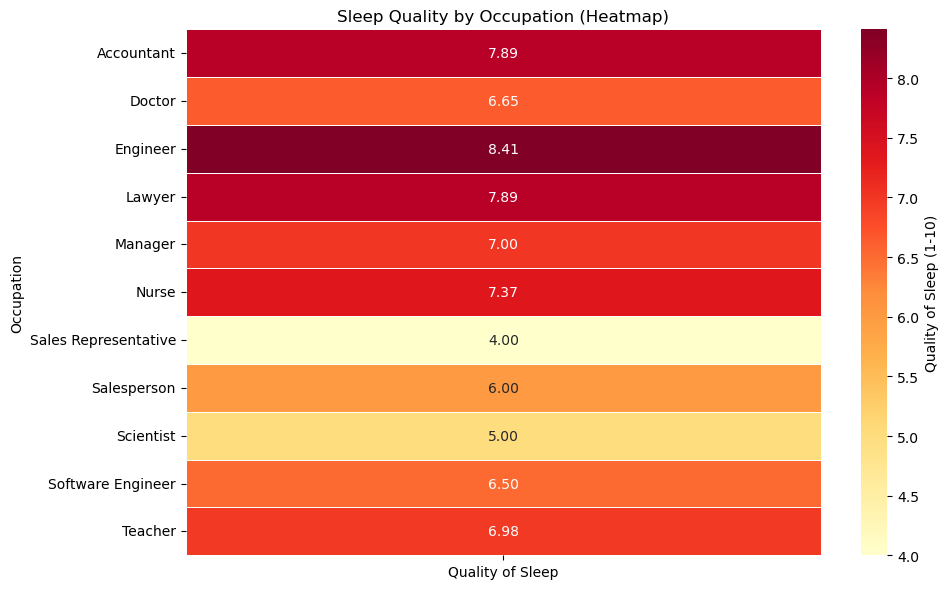


Statistical Summary by Occupation:
                     Sleep Duration       Quality of Sleep      
                               mean   std             mean   std
Occupation                                                      
Accountant                     7.11  0.31             7.89  0.46
Doctor                         6.97  0.86             6.65  0.76
Engineer                       7.99  0.51             8.41  0.75
Lawyer                         7.41  0.27             7.89  0.31
Manager                        6.90   NaN             7.00   NaN
Nurse                          7.06  0.99             7.37  1.55
Sales Representative           5.90  0.00             4.00  0.00
Salesperson                    6.40  0.09             6.00  0.00
Scientist                      6.00  0.23             5.00  1.15
Software Engineer              6.75  0.87             6.50  1.91
Teacher                        6.69  0.23             6.98  0.66


In [20]:
fig, (ax1) = plt.subplots(1,figsize=(24, 6))

sns.barplot(data=df, x='Occupation', y='Sleep Duration', ax=ax1, 
            ci='sd', color='skyblue')
ax1.set_title('Average Sleep Duration by Occupation')
ax1.set_ylabel('Sleep Duration (hours)')


heatmap_data = df.pivot_table(
    values='Quality of Sleep',
    index='Occupation',
    aggfunc='mean'
).round(2)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, 
            annot=True,  
            cmap='YlOrRd', 
            fmt='.2f',  
            cbar_kws={'label': 'Quality of Sleep (1-10)'},
            linewidths=0.5)

plt.title('Sleep Quality by Occupation (Heatmap)')
plt.tight_layout()
plt.show()


print("\nStatistical Summary by Occupation:")
summary = df.groupby('Occupation').agg({
    'Sleep Duration': ['mean', 'std'],
    'Quality of Sleep': ['mean', 'std']
}).round(2)
print(summary)

we can conclude that the engineers sleep quality and sleep hours are high

where sales representative both sleep quality and sleeping hours are low

so this sleepinghours are co-related with sleep auality

# Hypothesis Testing

 # Checking relation between physical activity level and BMI

Null Hypothesis (H0): There is no difference in sleep duration across different BMI categories (e.g., normal, obese).

Alternative Hypothesis (H1): There is a difference in sleep duration across different BMI categories.

In [41]:
sample_data=df[['Sleep Duration','BMI Category']].iloc[:51]

In [42]:
sample_data

,Sleep Duration,BMI Category
0,6.1,Overweight
1,6.2,Normal
2,6.2,Normal
3,5.9,Obese
4,5.9,Obese
5,5.9,Obese
6,6.3,Obese
7,7.8,Normal
8,7.8,Normal
9,7.8,Normal


In [43]:
#lets say bmi as factor with ['Overweight', 'Normal', 'Obese', 'Normal Weight'] as levels
phy_bmi=df.groupby('BMI Category')['Sleep Duration'].agg(['mean', 'std', 'count', 'min', 'max'])
print(phy_bmi)

                   mean       std  count  min  max
BMI Category                                      
Normal         7.393846  0.732080    195  6.0  8.5
Normal Weight  7.333333  0.585093     21  6.4  8.2
Obese          6.960000  0.883428     10  5.9  8.1
Overweight     6.770270  0.757768    148  5.8  8.2


In [56]:
pivot_df = df.pivot_table(index=df.index, columns='BMI Category', values='Sleep Duration', aggfunc='first').iloc[:51]
print(pivot_df)


BMI Category  Normal  Normal Weight  Obese  Overweight
0                NaN            NaN    NaN         6.1
1                6.2            NaN    NaN         NaN
2                6.2            NaN    NaN         NaN
3                NaN            NaN    5.9         NaN
4                NaN            NaN    5.9         NaN
5                NaN            NaN    5.9         NaN
6                NaN            NaN    6.3         NaN
7                7.8            NaN    NaN         NaN
8                7.8            NaN    NaN         NaN
9                7.8            NaN    NaN         NaN
10               6.1            NaN    NaN         NaN
11               7.8            NaN    NaN         NaN
12               6.1            NaN    NaN         NaN
13               6.0            NaN    NaN         NaN
14               6.0            NaN    NaN         NaN
15               6.0            NaN    NaN         NaN
16               NaN            6.5    NaN         NaN
17        

In [55]:
from scipy.stats import f_oneway
# Perform one-way ANOVA
anova_result = f_oneway(obese, normal, normal_weight, overweight)
print(f"F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}")
p_value=2.1273445794819258e-12
critical value=3.22
if p_value<0.05:
    print('rejectnull hypothesis')
else:
    print('accept null hypothesis')

F-Statistic: 20.66151226910848, P-Value: 2.1273445794819258e-12
rejectnull hypothesis


 Rejecting NUll hypothesis saying there is relation between sleephours and bmi_index

In [59]:

f_statistic = 20.66151226910848
df1 = 3  
df2 = 48 
CRITICAL_VALUE=3.22 #from ftable
if f_statistic>CRITICAL_VALUE:
    print('rejectnull hypothesis')
else:
    print('accept null hypothesis')


rejectnull hypothesis


In [ ]:
`